In [19]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re

In [170]:
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)
    
def func(x):
    x = x[6:]
    return x

def process_output(path = ''):
    '''Takes in the path to the folder with the data
    and returns a dataframe with the benchmark results in the columns 
    with their corresponding number of nodes and processes per node'''
    all_files = glob.glob(path + "*.log")

    df = pd.read_csv('data_23_32_1.log', index_col=None, sep = ':')
    df2 = df.transpose()
    df2.reset_index(level=0, inplace=True)
    df2 = df2.rename(columns=df2.iloc[0])
    df2.drop([0,1], inplace = True)

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, sep = ':')
        df = df.transpose()
        df.reset_index(level=0, inplace=True)
        df = df.rename(columns=df.iloc[0])
        df.drop([0], inplace = True)
        temp = [int(s) for s in re.findall(r'\d+', filename)]
        #df.insert(1, 'Number of nodes', [temp[1]])
        #df.insert(2, 'Processes/Node', [temp[2]])
        df['Number of nodes'] = int(temp[1])
        df['Processes/Node'] = int(temp[2])
        df2 = df2.append(df)
       
    for col in df2.columns:
        try:  
            df2[col] = df2[col].astype(float)
        except:
            df2[col] = df2[col].apply(func)
    df2['SCALE'] = df2['SCALE'].astype(int) 
    df2.reset_index(drop=True, inplace=True)
    move_column_inplace(df2, 'Number of nodes', 1)
    move_column_inplace(df2, 'Processes/Node', 2)
    return df2

def add_nodxproc(df):
    ''' this adds the NodesxProcessors column to a dataframe.
    nothing is returned - the passed data frame is changed.
    consider it as inplace=True.
    '''
    #numrows = df.shape[0]
    dummy_list = []
    #for i in range(numrows):
    for (idx,row) in df.iterrows():
        #append_val = df['ISO3'].iloc[i] + str(df['Year'].iloc[i])
        nodes = str(row['Number of nodes'])
        nodes = nodes[:nodes.index('.')]
        procs = str(row['Processes/Node'])
        procs = procs[:procs.index('.')]
        append_val = nodes + procs
        dummy_list.append(append_val)
    df['NodesxProcessors'] = dummy_list
    
def make_bar(df, column):
    ''' Takes a dataframe containing 'NodesxProcessors' columns as input and
    returns a bar plot of the column of choice in the input'''
    
    d = df.loc[df['NodesxProcessors'] == '3232']
    d = d.sort_values(by = 'SCALE', ascending = True) 
    d = d[[column, 'SCALE']]
    
    d2 = df.loc[df['NodesxProcessors'] == '321']
    d2 = d2.sort_values(by = 'SCALE', ascending = True) 
    d2 = d2[[column, 'SCALE']]
    
    d3 = df.loc[df['NodesxProcessors'] == '132']
    d3 = d3.sort_values(by = 'SCALE', ascending = True) 
    d3 = d3[[column, 'SCALE']]

    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(d['SCALE'] - width, d[column], width, label='32x32')
    rects2 = ax.bar(d2['SCALE'], d2[column], width, label='32x1')
    rects3 = ax.bar(d3['SCALE'] + width, d3[column], width, label='1x32')

    # Add a unit to display on y-axis
    s = ' [s]'
    ax.set_ylabel(column +s)
    ax.set_title('Scores by group and gender')
    ax.set_xticks(d['SCALE'])
    ax.legend()

In [171]:
df = process_output()

In [172]:
add_nodxproc(df)

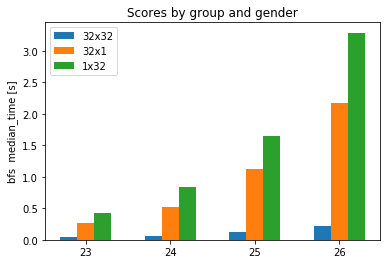

In [173]:
make_bar(df, 'bfs  median_time')

,SCALE,bfs median_time
0,26,0.218762
1,23,0.420755
2,24,0.830775
3,25,0.119312
4,26,3.287570
5,23,0.266497
6,26,2.172170
7,25,1.128340
8,24,0.522089
9,24,0.065366


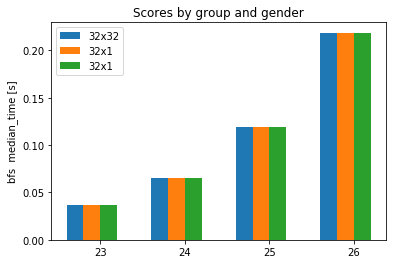

Index(['SCALE', 'Number of nodes', 'Processes/Node', 'edgefactor', 'NBFS',
       'graph_generation', 'num_mpi_processes', 'construction_time',
       'bfs  min_time', 'bfs  firstquartile_time', 'bfs  median_time',
       'bfs  thirdquartile_time', 'bfs  max_time', 'bfs  mean_time',
       'bfs  stddev_time', 'min_nedge', 'firstquartile_nedge', 'median_nedge',
       'thirdquartile_nedge', 'max_nedge', 'mean_nedge', 'stddev_nedge',
       'bfs  min_TEPS', 'bfs  firstquartile_TEPS', 'bfs  median_TEPS',
       'bfs  thirdquartile_TEPS', 'bfs  max_TEPS', 'bfs  harmonic_mean_TEPS',
       'bfs  harmonic_stddev_TEPS', 'bfs  min_validate',
       'bfs  firstquartile_validate', 'bfs  median_validate',
       'bfs  thirdquartile_validate', 'bfs  max_validate',
       'bfs  mean_validate', 'bfs  stddev_validate', 'NodesxProcessors'],
      dtype='object')